In [1]:
# Library imports
import numpy as np
import pickle

from train import train, generate_graph
import tools

In [2]:
# Fix random seed for reproducibility
np.random.seed(628496)

# Stop on errors
np.seterr('raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
# Load the anonymised data
file_path = 'datasets\\real_data_graph.pkl'
with open(file_path, 'rb') as f:
    edges_by_day, last_day, raw_accounts = pickle.load(f)


In [4]:
# Count the number of generated edges to validate that the correct data is loaded
count_edges = sum(len(day) for day in edges_by_day.values())
print(f'There were {count_edges} edges generated.')

There were 295 edges generated.


In [5]:
# Create a graph object with the loaded data
graph = generate_graph(
    raw_accounts=raw_accounts,
    edges_by_day=edges_by_day,
    last_day=last_day,
    node_dimension=1024,
    graph_kwords={
        'causal_learning_rate': 0.001,
        'spontaneous_learning_rate': 10**(-6),
        'weight_regularisation_rate': 10**(-6)
    }
)

100%|██████████| 300/300 [5:29:07<00:00, 65.83s/it]  


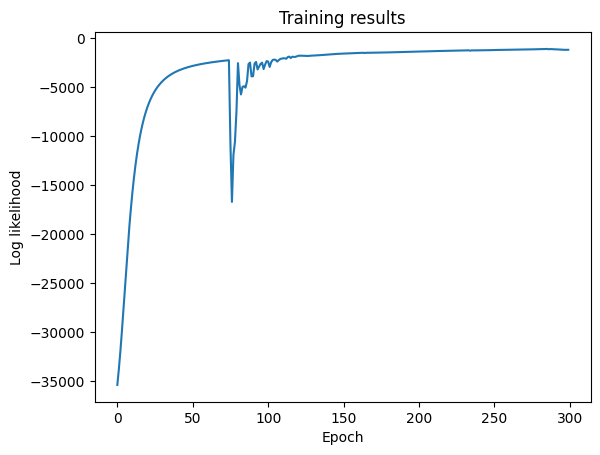

In [6]:
# Train
training_epochs = 300
start_spontaneous_from = 75

log_likelihoods = train(
    graph=graph,
    edges_by_day=edges_by_day,
    last_day=last_day,
    iterations=training_epochs,
    plot_log_likelihood=True,
    use_tqdm=True,
    spontaneous_learning_startpoint=start_spontaneous_from
)

In [7]:
# Save the results so they can be reloaded without having to retrain
with open('saved_results//anonymised_data_training_results.pkl', 'wb') as file:
    pickle.dump(log_likelihoods, file)

with open('saved_results//anonymised_data_trained_model.pkl', 'wb') as file:
    pickle.dump(graph, file)

In [8]:
# Print how many of each edge occurred in the accounting period
count_edge_by_type = {edge: 0 for edge in graph.possible_edges}

for day, edges in edges_by_day.items():
    for i, j, value in edges:
        count_edge_by_type[(i, j)] += 1

print(count_edge_by_type)

{(3, 7): 15, (8, 0): 1, (0, 2): 1, (1, 9): 6, (7, 4): 6, (3, 9): 98, (5, 0): 1, (3, 6): 1, (1, 2): 7, (2, 1): 4, (1, 5): 1, (6, 1): 6, (2, 10): 1, (4, 7): 6, (3, 5): 15, (5, 2): 2, (9, 6): 1, (2, 3): 108, (1, 7): 8, (6, 3): 1, (6, 9): 6}


In [43]:
# Get the details of the likelihoods
all_probabilities = tools.return_probabilities_of_edges(
    graph, edges_by_day, last_day
)

# These are tuples of the form:
# (time, i, j, count, probability, total_intensity, spontaneous_intensity, causal_intensity)

100%|██████████| 35/35 [00:07<00:00,  4.53it/s]


In [44]:
# Least likely edges
all_probabilities.sort(key=lambda x: x[4])
for details in all_probabilities[:10]:
    print(details)

(243, 3, 9, 98, 7.768311383105527e-210, 0.2745437170188734, 1e-06, 0.27454271701887345)
(244, 2, 3, 97, 4.085129703410052e-30, 23.358248533065805, 1e-06, 23.358247533065803)
(245, 3, 9, 0, 2.294556874842415e-12, 26.80048137391627, 1e-06, 26.80048037391627)
(243, 3, 7, 3, 5.836468046752141e-07, 0.015263121122088979, 1e-06, 0.01526212112208898)
(273, 3, 7, 3, 7.879667759500975e-07, 0.016878341733582682, 1e-06, 0.01687734173358268)
(1, 7, 4, 1, 9.999990000005012e-07, 1e-06, 1e-06, 0.0)
(90, 1, 9, 1, 9.999990000005012e-07, 1e-06, 1e-06, 0.0)
(120, 1, 7, 1, 9.999990000005012e-07, 1e-06, 1e-06, 0.0)
(120, 1, 9, 1, 9.999990000005012e-07, 1e-06, 1e-06, 0.0)
(151, 1, 7, 1, 9.999990000005012e-07, 1e-06, 1e-06, 0.0)


In [45]:
# Most likely edges (that occurred)
all_probabilities.sort(key=lambda x: x[4], reverse=True)

count_printed = 0
for details in all_probabilities[:]:
    if details[3] > 0:
        print(details)
        count_printed +=1
    if count_printed == 10:
        break

(244, 1, 2, 1, 0.22813004568307862, 0.3115074670485097, 0.00014091862117963566, 0.31136654842733)
(11, 1, 7, 1, 0.18831297810872388, 0.23920167696135172, 0.23790872181668907, 0.0012929551446626553)
(249, 1, 2, 1, 0.1509110478927581, 0.18082187957995194, 0.0005417348892399808, 0.18028014469071196)
(6, 1, 7, 1, 0.13164870848720509, 3.186560245298338, 3.185861772160725, 0.0006984731376129538)
(220, 2, 3, 1, 0.08530871045279517, 0.09368742649506606, 1e-06, 0.09368642649506606)
(31, 1, 7, 1, 0.03853589576734823, 0.040113112547558755, 0.03998956092241003, 0.00012355162514872398)
(347, 1, 2, 1, 0.036926895855448935, 0.03837136728308212, 0.0006677993371465431, 0.03770356794593557)
(286, 2, 3, 1, 0.036593268749070464, 0.03801098885783384, 1e-06, 0.03800998885783384)
(355, 2, 1, 1, 0.036295465374646764, 0.03768953021967491, 1e-06, 0.03768853021967491)
(243, 3, 6, 1, 0.026375398369202756, 0.0270999433945733, 1e-06, 0.027098943394573298)


In [34]:
# Analyse the possible excitations

# Find all the excitations with weight about epsilon
excitees = []
for i in range(graph.count_nodes):
    for j in range(graph.count_nodes):
        if (i, j) in graph.possible_excitees:
                excitees.extend(
                    [(f'({i}, {j}) to {excitee}', weibull_weight, weibull_alpha, weibull_beta)
                      for excitee, ((weibull_weight, weibull_alpha, weibull_beta),
                                    (lin_val_weight, lin_val_alpha, lin_val_beta))
                      in graph.possible_excitees[(i, j)].items()]
                    )

# Sort by the weight
excitees.sort(key=lambda x: x[1], reverse=True)

how_far = 21
for (excitor_information, weibull_weight, weibull_alpha, weibull_beta) in excitees[:how_far]:
    print(excitor_information, weibull_weight, weibull_alpha, weibull_beta)


(2, 3) to (3, 9) 0.3077204481986896 0.5078908099654084 1.1792593092528958
(3, 9) to (2, 3) 0.2585360878139736 0.5032869799557214 1.2897291825944301
(2, 10) to (3, 9) 0.18108985645035125 10.557637968223913 4.476945319199112
(3, 6) to (2, 3) 0.12078028735926646 0.5159321647488196 1.8322844544322034
(6, 3) to (3, 9) 0.11881445368580036 2.188709087647042 2.8729624285445907
(8, 0) to (2, 3) 0.11043826688836934 8.52456018564936 12.223682521584564
(2, 1) to (3, 9) 0.1065295590712172 8.55444969307058 4.407715619654873
(3, 7) to (2, 3) 0.08775433090082468 4.633040500258558 1.668851184700218
(1, 9) to (2, 3) 0.08754373400065903 2.760426617064785 3.5481478455994804
(0, 2) to (2, 3) 0.08611812060747429 4.707712562947866 4.840528419341077
(0, 2) to (3, 9) 0.08364103062255808 10.390110232394807 4.471883255170699
(7, 4) to (2, 3) 0.078984922172481 22.530321349596733 2.295220904252956
(5, 0) to (2, 3) 0.07693943846799213 8.518937362686362 11.064440349009669
(6, 9) to (2, 3) 0.07653152568398637 0.62064

In [35]:
# Inspect genuine causal behaviour
for (excitor_information, weibull_weight, weibull_alpha, weibull_beta) in excitees:
    if excitor_information in [
            '(4, 7) to (7, 4)', '(7, 4) to (4, 7)',
            '(4, 7) to (4, 7)', '(7, 4) to (7, 4)']:
        # Print any excitations relating to the genuine causal behaviour
        print(excitor_information, weibull_weight, weibull_alpha, weibull_beta)

(7, 4) to (4, 7) 0.017006136442553423 17.945520340279366 1.633361978314006
(4, 7) to (7, 4) 0.010976513220502821 15.256228949748385 1.1888733813343737
(7, 4) to (7, 4) 0.010411855617430455 24.415958249351604 1.7276473238812677
(4, 7) to (4, 7) 0.010182808379133584 10.264298785107247 1.1284479721490406


In [50]:
# Inspect model performance on genuine causal behaviour
for details in all_probabilities:
    if details[1] == 4 and details[2] == 7 and details[3] > 0:
        print(details)
    elif details[1] == 7 and details[2] == 4 and details[3] > 0:
        print(details)

(1, 7, 4, 1, 9.999990000005012e-07, 1e-06, 1e-06, 0.0)
(243, 4, 7, 1, 0.006133593767828791, 0.006171564688011731, 1e-06, 0.006170564688011731)
(365, 4, 7, 1, 0.006195175944526463, 0.006233916783949902, 1e-06, 0.006232916783949902)
(243, 7, 4, 1, 0.008572097786903307, 0.008646538118982918, 1.001060945225448e-06, 0.008645537058037693)
(334, 7, 4, 1, 0.013610835519880085, 0.013799966595161051, 1.000005836652276e-06, 0.0137989665893244)
(304, 7, 4, 1, 0.013876972525213698, 0.014073652980872648, 1.0000332900635948e-06, 0.014072652947582583)
(273, 4, 7, 1, 0.015868573178699184, 0.016126553140148114, 1e-06, 0.016125553140148113)
(334, 4, 7, 1, 0.01599676089344328, 0.016258977786290953, 1e-06, 0.016257977786290952)
(273, 7, 4, 1, 0.016418380290965925, 0.01669478239389256, 1.00018791592693e-06, 0.016693782205976632)
(304, 4, 7, 1, 0.01685740714924198, 0.017148987624999674, 1e-06, 0.017147987624999673)
(212, 4, 7, 1, 0.02285735601200489, 0.023398489791394462, 1e-06, 0.02339748979139446)
(212, 7,

In [47]:
# Inspect (1, 2) excitation
for (excitor_information, weibull_weight, weibull_alpha, weibull_beta) in excitees:
    if ' to (1, 2)' in excitor_information:
        # Print any excitations exciting (1, 2)
        print(excitor_information, weibull_weight, weibull_alpha, weibull_beta)

(8, 0) to (1, 2) 0.024838393958138343 8.63403068776832 20.664519659655262
(5, 0) to (1, 2) 0.023143748575101313 8.579959790287717 17.45699479737335
(1, 5) to (1, 2) 0.019246980012982844 10.655916878718248 11.310956571879895
(1, 9) to (1, 2) 0.017318316316171912 9.844529669911312 6.508021999140735
(7, 4) to (1, 2) 0.017283810459113112 24.518212561772355 1.5985179583970401
(6, 1) to (1, 2) 0.01696513717538762 14.488520497064346 2.3956561792388666
(2, 1) to (1, 2) 0.016074060568495165 12.177476020639844 4.919249003406433
(3, 6) to (1, 2) 0.015911219838804717 5.43802882342839 1.4314853208417375
(3, 7) to (1, 2) 0.014874581860747608 9.965737475664504 1.10428881774349
(1, 7) to (1, 2) 0.01472721637870249 16.371209251004665 6.505890011928313
(6, 9) to (1, 2) 0.01463959951701708 8.967327158105988 1.343165439868026
(0, 2) to (1, 2) 0.014450905947248786 12.686221709917323 7.00777857849778
(1, 2) to (1, 2) 0.01426526597321952 7.59977089044596 13.136914844229658
(3, 9) to (1, 2) 0.0138506276923810